In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import precision_score, accuracy_score, f1_score, mean_squared_error, mean_absolute_error
from tqdm import tqdm
import os
os.chdir("D://meridianthe4//PML//Datasets")

In [2]:
wine = pd.read_csv("wine.csv")

In [4]:
X, y = wine.drop("Class", axis=1), wine["Class"]

In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [18]:
y.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

In [22]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in tqdm(features):
    for n in n_est:
        rf = RandomForestClassifier(n_estimators=n, max_features=f, random_state=25)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, f1_score(y_test, y_pred, average='macro')])
scores_df = pd.DataFrame(scores, columns=["Features", "Trees", "score"])
scores_df.sort_values(by="score", ascending=False)

  0%|          | 0/4 [00:00<?, ?it/s]d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

,Features,Trees,score
0,2,25,0.945153
1,2,50,0.945153
2,2,100,0.945153
3,2,150,0.945153
4,2,200,0.945153
5,3,25,0.945153
6,3,50,0.945153
7,3,100,0.945153
8,3,150,0.945153
9,3,200,0.945153


d:\meridianthe4\PML\main\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


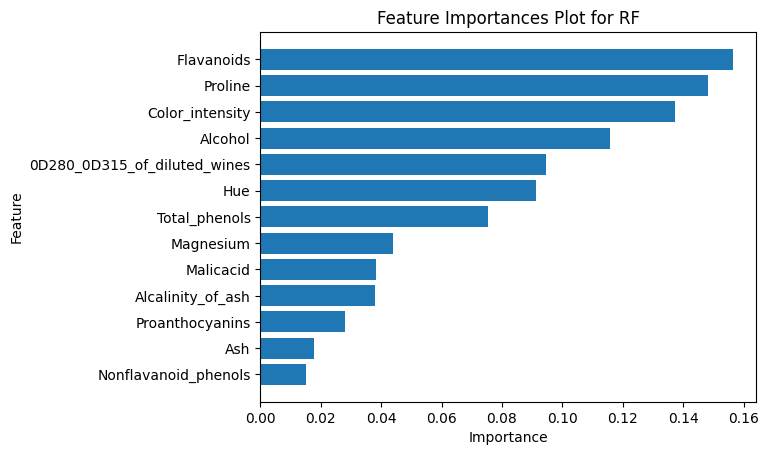

In [21]:
best_model = RandomForestClassifier(random_state=25, n_estimators=100, max_features=2)
best_model.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_model.feature_importances_})
df_imp = df_imp.sort_values("importance")
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances Plot for RF")
plt.show()